In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from time import time

from gwpy.timeseries import TimeSeries

from tof_data_analysis import *

Main plot:   0%|          | 0/100 [00:00<?, ?it/s]

/home/azimuth/.local/lib/python3.9/site-packages/gwpy/signal/qtransform.py:124: UserWarning: upper frequency of 2048.00 is too high for the given Q range, resetting to 1291.05
  warnings.warn('upper frequency of %.2f is too high for the given '
/home/azimuth/.local/lib/python3.9/site-packages/gwpy/signal/qtransform.py:124: UserWarning: upper frequency of 2048.00 is too high for the given Q range, resetting to 1291.05
  warnings.warn('upper frequency of %.2f is too high for the given '
/home/azimuth/.local/lib/python3.9/site-packages/gwpy/timeseries/timeseries.py:925: UserWarning: resample() rate matches current sample_rate (4096.0 Hz), returning input data unmodified; please double-check your parameters
  warnings.warn(


Windows of length 4:   0%|          | 0/200 [00:00<?, ?it/s]

/home/azimuth/.local/lib/python3.9/site-packages/gwpy/signal/qtransform.py:124: UserWarning: upper frequency of 2048.00 is too high for the given Q range, resetting to 1291.05
  warnings.warn('upper frequency of %.2f is too high for the given '
/home/azimuth/.local/lib/python3.9/site-packages/gwpy/signal/qtransform.py:124: UserWarning: upper frequency of 2048.00 is too high for the given Q range, resetting to 1291.05
  warnings.warn('upper frequency of %.2f is too high for the given '
/home/azimuth/.local/lib/python3.9/site-packages/gwpy/signal/qtransform.py:124: UserWarning: upper frequency of 2048.00 is too high for the given Q range, resetting to 1291.05
  warnings.warn('upper frequency of %.2f is too high for the given '
/home/azimuth/.local/lib/python3.9/site-packages/gwpy/signal/qtransform.py:124: UserWarning: upper frequency of 2048.00 is too high for the given Q range, resetting to 1291.05
  warnings.warn('upper frequency of %.2f is too high for the given '
/home/azimuth/.local

Windows of length 30:   0%|          | 0/27 [00:00<?, ?it/s]

/home/azimuth/.local/lib/python3.9/site-packages/gwpy/signal/qtransform.py:124: UserWarning: upper frequency of 2048.00 is too high for the given Q range, resetting to 1291.05
  warnings.warn('upper frequency of %.2f is too high for the given '
/home/azimuth/.local/lib/python3.9/site-packages/gwpy/signal/qtransform.py:124: UserWarning: upper frequency of 2048.00 is too high for the given Q range, resetting to 1291.05
  warnings.warn('upper frequency of %.2f is too high for the given '


Windows of length 120:   0%|          | 0/7 [00:00<?, ?it/s]

/home/azimuth/.local/lib/python3.9/site-packages/gwpy/signal/qtransform.py:124: UserWarning: upper frequency of 2048.00 is too high for the given Q range, resetting to 1291.05
  warnings.warn('upper frequency of %.2f is too high for the given '
/home/azimuth/.local/lib/python3.9/site-packages/gwpy/signal/qtransform.py:124: UserWarning: upper frequency of 2048.00 is too high for the given Q range, resetting to 1291.05
  warnings.warn('upper frequency of %.2f is too high for the given '
/home/azimuth/.local/lib/python3.9/site-packages/gwpy/signal/qtransform.py:124: UserWarning: upper frequency of 2048.00 is too high for the given Q range, resetting to 1291.05
  warnings.warn('upper frequency of %.2f is too high for the given '
/mnt/c/Users/Azimuth Zero/Documents/GitHub/LOFscratch/tof_data_analysis.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Processed 800.0 seconds of data in 1180.4851381778717 seconds


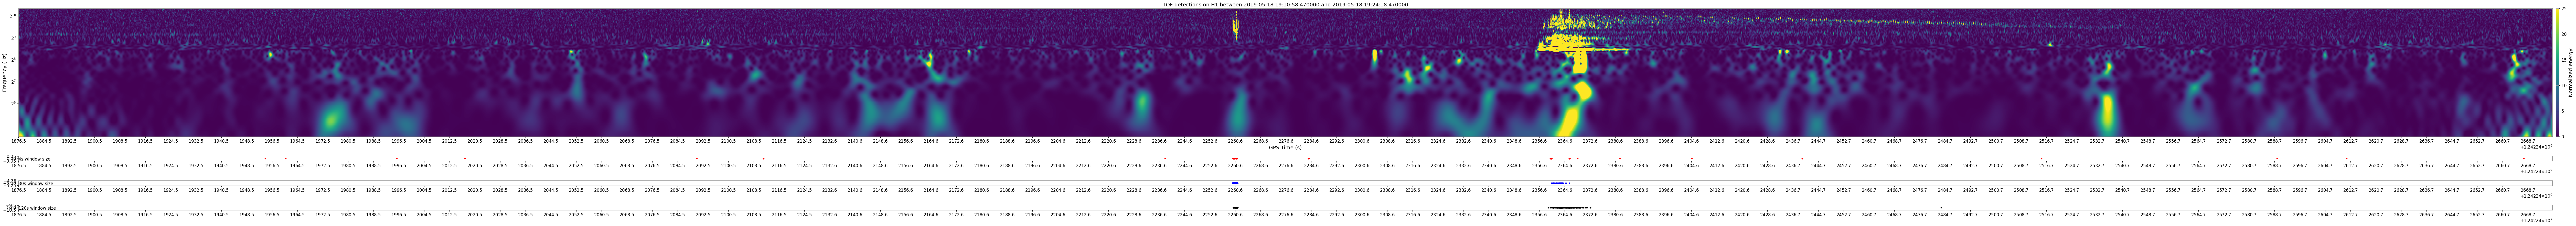

In [2]:
QUAKE = 1242242376.47
t0 = QUAKE - 500
t1 = QUAKE + 300

start = time()
tof_detections_in_open_data(
    'H1', t0, t1, padding=50, save_dir='data/pipeline/quake',
    q_kwargs={'frange': (0, 2**11), 'fres': 1024, 'logf': True}, n_neighbors=9, event_length=1450)
stop = time()

print(f'Processed {t1-t0} seconds of data in {stop-start} seconds')

In [ ]:
## Retracted events

RETRACTED_O3 = {
    'S190928c': 1253671923.33,
    'S190829u': 1251147973.28,
    'S190822c': 1250472616.59,
    'S190816i': 1249995888.76,
    'S190808ae': 1249338098.50,
    'S190524q': 1242708743.68,
    'S190405ar': 1238515307.86
}

DETECTORS = ['H1', 'L1', 'V1']

In [ ]:
for label, gps_time in tqdm(RETRACTED_O3.items()):
    t0 = gps_time - 500
    t1 = gps_time + 500
    for det in DETECTORS:
        try:
            start = time()
            tof_detections_in_open_data(
                det, t0, t1, padding=50, save_dir=f'data/pipeline/{label}',
                q_kwargs={'logf': True}, n_neighbors=9, event_length=1450
            )
            stop = time()
            print(f'Processed {t1-t0} seconds of data in {stop-start} seconds')
        except Exception as e:
            print(f'Encountered error, skipping: {e}')